In [49]:
import numpy as np
import gensim, logging
import csv, string
import nltk
#nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
import pandas as pd
import tensorflow as tf
import os
import pickle

num_words = 100
num_words_description = 100
directory_prefix = "../"
label_depth = 3
import random
#import gensim.downloader as api
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords

import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/tf2-preview/nnlm-en-dim128-with-normalization/1")
#embed = hub.load("https://tfhub.dev/google/Wiki-words-500/2")

embeddings = embed(["cat is on the mat", "dog is in the fog"])
embedding_dim = embeddings.shape[1]
#print(embeddings)
def get_sentence_vector(words, num_words):
    words = word_tokenize(words)
    #words = list(filter(lambda w: len(w)>2, words))
    ret = embed(words)
    ret = tf.pad(ret, tf.constant([[0, max(0, num_words-ret.shape[0]),], [0, 0]]), "CONSTANT")
    ret = ret[:num_words]
    return ret

def get_label_vector(label):
    ret = tf.constant([ord(label[0])-ord("A"), int(label[1:3]), ord(label[3])-ord("A")])[:label_depth-1]
    print(ret, label)
    
    return ret
all_labels = {"A01B","A01C","A01D","A01F","A01G","A01H","A01J","A01K","A01L","A01M","A01N","A21B","A21C","A21D","A22B","A22C","A23B","A23C","A23D","A23F","A23G","A23J","A23K","A23L","A23N","A23P","A23V","A23Y","A24B","A24C","A24D","A24F","A41B","A41C","A41D","A41F","A41G","A41H","A42B","A42C","A43B","A43C","A43D","A44B","A44C","A44D","A45B","A45C","A45D","A45F","A46B","A46D","A47B","A47C","A47D","A47F","A47G","A47H","A47J","A47K","A47L","A61B","A61C","A61D","A61F","A61G","A61H","A61J","A61K","A61L","A61M","A61N","A61P","A61Q","A62B","A62C","A62D","A63B","A63C","A63D","A63F","A63G","A63H","A63J","A63K","A99Z","B01B","B01D","B01F","B01J","B01L","B02B","B02C","B03B","B03C","B03D","B04B","B04C","B05B","B05C","B05D","B06B","B07B","B07C","B08B","B09B","B09C","B21B","B21C","B21D","B21F","B21G","B21H","B21J","B21K","B21L","B22C","B22D","B22F","B23B","B23C","B23D","B23F","B23G","B23H","B23K","B23P","B23Q","B24B","B24C","B24D","B25B","B25C","B25D","B25F","B25G","B25H","B25J","B26B","B26D","B26F","B27B","B27C","B27D","B27F","B27G","B27H","B27J","B27K","B27L","B27M","B27N","B28B","B28C","B28D","B29B","B29C","B29D","B29K","B29L","B30B","B31B","B31C","B31D","B31F","B32B","B33Y","B41B","B41C","B41D","B41F","B41G","B41J","B41K","B41L","B41M","B41N","B41P","B42B","B42C","B42D","B42F","B42P","B43K","B43L","B43M","B44B","B44C","B44D","B44F","B60B","B60C","B60D","B60F","B60G","B60H","B60J","B60K","B60L","B60M","B60N","B60P","B60Q","B60R","B60S","B60T","B60V","B60W","B60Y","B61B","B61C","B61D","B61F","B61G","B61H","B61J","B61K","B61L","B62B","B62C","B62D","B62H","B62J","B62K","B62L","B62M","B63B","B63C","B63G","B63H","B63J","B64B","B64C","B64D","B64F","B64G","B65B","B65C","B65D","B65F","B65G","B65H","B66B","B66C","B66D","B66F","B67B","B67C","B67D","B68B","B68C","B68F","B68G","B81B","B81C","B82B","B82Y","B99Z","C01B","C01C","C01D","C01F","C01G","C01P","C02F","C03B","C03C","C04B","C05B","C05C","C05D","C05F","C05G","C06B","C06C","C06D","C06F","C07B","C07C","C07D","C07F","C07G","C07H","C07J","C07K","C08B","C08C","C08F","C08G","C08H","C08J","C08K","C08L","C09B","C09C","C09D","C09F","C09G","C09H","C09J","C09K","C10B","C10C","C10F","C10G","C10H","C10J","C10K","C10L","C10M","C10N","C11B","C11C","C11D","C12C","C12F","C12G","C12H","C12J","C12L","C12M","C12N","C12P","C12Q","C12R","C12Y","C13B","C13K","C14B","C14C","C21B","C21C","C21D","C22B","C22C","C22F","C23C","C23D","C23F","C23G","C25B","C25C","C25D","C25F","C30B","C40B","C99Z","D01B","D01C","D01D","D01F","D01G","D01H","D02G","D02H","D02J","D03C","D03D","D03J","D04B","D04C","D04D","D04G","D04H","D05B","D05C","D05D","D06B","D06C","D06F","D06G","D06H","D06J","D06L","D06M","D06N","D06P","D06Q","D07B","D10B","D21B","D21C","D21D","D21F","D21G","D21H","D21J","D99Z","E01B","E01C","E01D","E01F","E01H","E02B","E02C","E02D","E02F","E03B","E03C","E03D","E03F","E04B","E04C","E04D","E04F","E04G","E04H","E05B","E05C","E05D","E05F","E05G","E05Y","E06B","E06C","E21B","E21C","E21D","E21F","E99Z","F01B","F01C","F01D","F01K","F01L","F01M","F01N","F01P","F02B","F02C","F02D","F02F","F02G","F02K","F02M","F02N","F02P","F03B","F03C","F03D","F03G","F03H","F04B","F04C","F04D","F04F","F05B","F05C","F05D","F15B","F15C","F15D","F16B","F16C","F16D","F16F","F16G","F16H","F16J","F16K","F16L","F16M","F16N","F16P","F16S","F16T","F17B","F17C","F17D","F21H","F21K","F21L","F21S","F21V","F21W","F21Y","F22B","F22D","F22G","F23B","F23C","F23D","F23G","F23H","F23J","F23K","F23L","F23M","F23N","F23Q","F23R","F24B","F24C","F24D","F24F","F24H","F24S","F24T","F24V","F25B","F25C","F25D","F25J","F26B","F27B","F27D","F27M","F28B","F28C","F28D","F28F","F28G","F41A","F41B","F41C","F41F","F41G","F41H","F41J","F42B","F42C","F42D","F99Z","G01B","G01C","G01D","G01F","G01G","G01H","G01J","G01K","G01L","G01M","G01N","G01P","G01Q","G01R","G01S","G01T","G01V","G01W","G02B","G02C","G02F","G03B","G03C","G03D","G03F","G03G","G03H","G04B","G04C","G04D","G04F","G04G","G04R","G05B","G05D","G05F","G05G","G06C","G06D","G06E","G06F","G06G","G06J","G06K","G06M","G06N","G06Q","G06T","G07B","G07C","G07D","G07F","G07G","G08B","G08C","G08G","G09B","G09C","G09D","G09F","G09G","G10B","G10C","G10D","G10F","G10G","G10H","G10K","G10L","G11B","G11C","G12B","G16B","G16C","G16H","G16Z","G21B","G21C","G21D","G21F","G21G","G21H","G21J","G21K","G99Z","H01B","H01C","H01F","H01G","H01H","H01J","H01K","H01L","H01M","H01P","H01Q","H01R","H01S","H01T","H02B","H02G","H02H","H02J","H02K","H02M","H02N","H02P","H02S","H03B","H03C","H03D","H03F","H03G","H03H","H03J","H03K","H03L","H03M","H04B","H04H","H04J","H04K","H04L","H04M","H04N","H04Q","H04R","H04S","H04T","H04W","H05B","H05C","H05F","H05G","H05H","H05K","H99Z","Y02A","Y02B","Y02C","Y02D","Y02E","Y02P","Y02T","Y02W","Y04S","Y10S","Y10T"}
label_dict = {k[:label_depth]: get_label_vector(k) for k in all_labels}

label_dict_keys = set(label_dict.keys())


[nltk_data] Downloading package stopwords to /home/jpark/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


tf.Tensor([2 8], shape=(2,), dtype=int32) C08L
tf.Tensor([ 5 24], shape=(2,), dtype=int32) F24H
tf.Tensor([ 0 47], shape=(2,), dtype=int32) A47F
tf.Tensor([1 2], shape=(2,), dtype=int32) B02C
tf.Tensor([ 1 26], shape=(2,), dtype=int32) B26B
tf.Tensor([6 1], shape=(2,), dtype=int32) G01M
tf.Tensor([ 1 61], shape=(2,), dtype=int32) B61F
tf.Tensor([6 3], shape=(2,), dtype=int32) G03F
tf.Tensor([ 0 47], shape=(2,), dtype=int32) A47J
tf.Tensor([ 2 21], shape=(2,), dtype=int32) C21C
tf.Tensor([2 7], shape=(2,), dtype=int32) C07J
tf.Tensor([ 0 47], shape=(2,), dtype=int32) A47G
tf.Tensor([ 1 41], shape=(2,), dtype=int32) B41F
tf.Tensor([ 0 41], shape=(2,), dtype=int32) A41D
tf.Tensor([7 1], shape=(2,), dtype=int32) H01R
tf.Tensor([ 1 66], shape=(2,), dtype=int32) B66D
tf.Tensor([ 5 21], shape=(2,), dtype=int32) F21L
tf.Tensor([ 2 25], shape=(2,), dtype=int32) C25D
tf.Tensor([ 5 24], shape=(2,), dtype=int32) F24T
tf.Tensor([4 2], shape=(2,), dtype=int32) E02C
tf.Tensor([5 2], shape=(2,), dtype

tf.Tensor([7 1], shape=(2,), dtype=int32) H01T
tf.Tensor([5 1], shape=(2,), dtype=int32) F01M
tf.Tensor([ 0 41], shape=(2,), dtype=int32) A41G
tf.Tensor([ 0 61], shape=(2,), dtype=int32) A61C
tf.Tensor([5 2], shape=(2,), dtype=int32) F02B
tf.Tensor([6 7], shape=(2,), dtype=int32) G07D
tf.Tensor([24 10], shape=(2,), dtype=int32) Y10S
tf.Tensor([7 2], shape=(2,), dtype=int32) H02N
tf.Tensor([24  2], shape=(2,), dtype=int32) Y02B
tf.Tensor([6 8], shape=(2,), dtype=int32) G08C
tf.Tensor([ 1 43], shape=(2,), dtype=int32) B43L
tf.Tensor([ 0 24], shape=(2,), dtype=int32) A24B
tf.Tensor([ 1 62], shape=(2,), dtype=int32) B62M
tf.Tensor([1 1], shape=(2,), dtype=int32) B01F
tf.Tensor([2 6], shape=(2,), dtype=int32) C06D
tf.Tensor([ 0 63], shape=(2,), dtype=int32) A63B
tf.Tensor([2 7], shape=(2,), dtype=int32) C07K
tf.Tensor([3 1], shape=(2,), dtype=int32) D01F
tf.Tensor([2 5], shape=(2,), dtype=int32) C05G
tf.Tensor([3 4], shape=(2,), dtype=int32) D04H
tf.Tensor([ 1 62], shape=(2,), dtype=int32) 

In [3]:
print(len(label_dict.keys()))

671


In [57]:
def lstm_data_generator():
    current_dataframe = pd.read_csv(directory_prefix+'/datasets/items2.csv',sep=',', header = None).to_numpy()#, chunksize=100000)
    #indices = np.random.choice(300000, 200000)
    for row in current_dataframe:
        label, description=row[0], row[1]
        lstm_input_patent = get_sentence_vector(description.lower(), num_words)
        label_vectors = [z.strip().strip('\'\"')[:label_depth] for z in label.split(',')]
        label_vectors = set([i for i in label_vectors if i in label_dict_keys])
        non_true_vectors = set([i for i in random.sample(label_dict_keys, min(len(label_vectors), len(label_dict.keys()))) if i not in label_vectors])
        for l, k in zip((label_dict[i] for i in label_vectors), label_vectors):
            yield ({'input_1':lstm_input_patent, 'input_2':l}, {'output_binary':[1]})
        for l, k in zip((label_dict[i] for i in non_true_vectors), non_true_vectors):
            yield ({'input_1':lstm_input_patent, 'input_2':l}, {'output_binary':[0]})
    print("went through the dataset once")
        
        
lstm_dataset = tf.data.Dataset.from_generator(lstm_data_generator, ({'input_1':tf.float64, 'input_2':tf.float64}, {'output_binary':tf.float64}), ({'input_1':tf.TensorShape([num_words, embedding_dim]), 'input_2':tf.TensorShape([label_depth-1,])}, {'output_binary':tf.TensorShape([1])}))
lstm_dataset = lstm_dataset.batch(16, drop_remainder=True).prefetch(10).repeat()
           

In [51]:
for items in lstm_dataset:
    print(items)
    break

({'input_1': <tf.Tensor: shape=(8, 100, 128), dtype=float64, numpy=
array([[[ 0.17849712, -0.04519277, -0.01800628, ..., -0.04414997,
         -0.05275302, -0.00975736],
        [-0.04820003, -0.05761553, -0.03048524, ..., -0.1434892 ,
         -0.00309712, -0.04195911],
        [ 0.22104432, -0.01606884,  0.00432623, ...,  0.13655335,
          0.01242723,  0.00964247],
        ...,
        [ 0.05454661, -0.04850974,  0.14662768, ..., -0.12364309,
          0.16872707, -0.03083483],
        [ 0.02229724,  0.23301387,  0.02603486, ..., -0.0488579 ,
          0.04628583, -0.10022217],
        [-0.23914389,  0.15859699, -0.08629441, ...,  0.16058695,
          0.04606962,  0.06838664]],

       [[ 0.17849712, -0.04519277, -0.01800628, ..., -0.04414997,
         -0.05275302, -0.00975736],
        [-0.04820003, -0.05761553, -0.03048524, ..., -0.1434892 ,
         -0.00309712, -0.04195911],
        [ 0.22104432, -0.01606884,  0.00432623, ...,  0.13655335,
          0.01242723,  0.00964247],

In [52]:


input_lstm = tf.keras.Input(shape=(num_words, embedding_dim), name='input_1')
input_label = tf.keras.Input(shape=(label_depth-1,), name='input_2')

patent_mask = tf.keras.layers.Masking(mask_value=0., input_shape=(num_words, embedding_dim))(input_lstm)

layer_size = embedding_dim*2

patent = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim*2, return_sequences=True))(patent_mask)
patent = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(layer_size*2))(patent)
patent = tf.keras.layers.GlobalAveragePooling1D()(patent)
patent = tf.keras.layers.Dense(layer_size*2)(patent)

concat = tf.keras.layers.Concatenate(axis=1)([input_label, patent])
dense = tf.keras.layers.Dense(int(layer_size)*2)(concat)
dense = tf.keras.layers.Dense(int(layer_size)*2)(dense)
dense = tf.keras.layers.Dense(int(layer_size)*2)(dense)
dense = tf.keras.layers.Dense(int(layer_size)*2)(dense)
dense = tf.keras.layers.Dense(int(layer_size)*2)(dense)

dense = tf.keras.layers.Dense(int(layer_size)*2, activation='relu')(dense)
dense = tf.keras.layers.Dense(int(layer_size)*2, activation='relu')(dense)
dense = tf.keras.layers.Dense(int(layer_size)*2, activation='relu')(dense)

output_binary = tf.keras.layers.Dense(1, activation="sigmoid", name='output_binary')(dense)


#lstm_enforce_1 = tf.keras.layers.Dense(200, activation='relu')(patent_lstm)
#lstm_enforce_2 = tf.keras.layers.Dense(1000, name='output_2')(lstm_enforce_1)
#model = tf.keras.Model(inputs={'input_1':input_lstm, 'input_2':input_label}, outputs={'output_1':output_binary, 'output_2':lstm_enforce_2})
model = tf.keras.Model(inputs={'input_1':input_lstm, 'input_2':input_label}, outputs=[output_binary])
print(model)

In [53]:
print(len(label_dict))

136


In [54]:
#saver = tf.train.Saver(max_to_keep=4, keep_checkpoint_every_n_hours=2)
#del model
#model.load_weights(directory_prefix+"/checkpoints/doublelstmcheckpoint2.h5")

model.summary()
opt = tf.optimizers.Adam(1e-5)
model.compile(loss=['binary_crossentropy'],
              optimizer=opt,
              metrics=['accuracy'], experimental_run_tf_function=False)


# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=directory_prefix+"/checkpoints/doublelstmcheckpoint1.h5",
                                                 save_weights_only=False,
                                                 verbose=1)

class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        generate_prc()
prc_callback = CustomCallback()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 128)]   0                                            
__________________________________________________________________________________________________
masking_3 (Masking)             (None, 100, 128)     0           input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 100, 512)     788480      masking_3[0][0]                  
__________________________________________________________________________________________________
time_distributed_3 (TimeDistrib (None, 100, 512)     262656      bidirectional_3[0][0]            
_______________________________________________________________________________________

(136, 2)


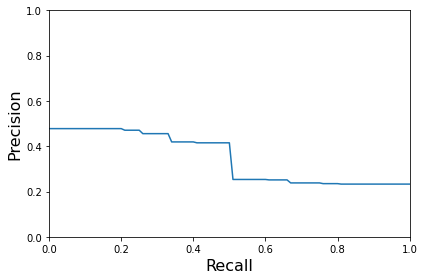

7.4755401611328125


<Figure size 432x288 with 0 Axes>

In [64]:
label_len = len(label_dict_keys)
left_vectors = np.array(list(label_dict_keys)).reshape((label_len))
left = np.vstack([label_dict[i] for i in label_dict_keys])#.reshape((label_len, num_words_description, embedding_dim))

recalls = np.arange(0, 1.01, .01)
def get_n(prediction, label_vectors):
    indices = np.flip(np.argsort(prediction, axis=0)).reshape((label_len))
    #print(left_vectors[indices])
    e = [1 if i in label_vectors else 0 for i in left_vectors[indices]]
    cur = []
    total_ones = e.count(1)
    n = 0
    ones_seen = 0
    while ones_seen < total_ones:
        if e[n] == 1:
            ones_seen = ones_seen+1
        n = n+1
        cur.append((ones_seen/float(n), ones_seen/float(total_ones)))
    new_cur = []
    for r in recalls:
        max_of_larger = max([i[0] for i in cur if i[1] >= r])
        new_cur.append(max_of_larger)
    return new_cur

print(left.shape)
def generate_prc():
    #print(label_len)
    num_tests = 100
    ns = []
    k = 0
    for row in pd.read_csv(directory_prefix+'/datasets/items1.csv',sep=',', header = None).to_numpy()[:num_tests]:
        #print(row)
        k+=1
        label, description=row[0], row[1]
        label_vectors = [z.strip().strip('\'\"')[:label_depth] for z in label.split(',')]
        label_vectors = set([i for i in label_vectors if i in label_dict_keys])
        if label_vectors == set():
            continue
        lstm_input_patent =  get_sentence_vector(description.lower(), num_words)
        output = np.vstack([lstm_input_patent]*label_len)
        output = output.reshape((label_len, num_words, embedding_dim))
        #print(output.shape, left.shape)
        #output = np.broadcast_to(lstm_input_patent, (label_len, lstm_input_patent.shape[0], lstm_input_patent.shape[1]))
        #print(output.shape, left.shape)
        prediction = model.predict({"input_1":output, "input_2":left}, verbose=0)
        #print(prediction.shape)
        n = get_n(prediction, label_vectors)
        ns.append(n)
        
    p = np.mean(np.array(ns), axis=0)
    import matplotlib.pyplot as plt
    plt.plot(recalls, p)
    plt.ylim(0, 1)
    plt.xlim(0, 1)
    plt.margins(0.1)
    #plt.xticks(range(len(distribution_dict.keys()))[::50], new_x[::50], rotation='vertical')
    plt.ylabel('Precision', fontsize=16)
    plt.xlabel('Recall', fontsize=16)
    plt.tight_layout()
    plt.show()
    #print(p) 
    plt.savefig('binary_prc1.eps', format='eps')
import time

start = time.time()
generate_prc()
end = time.time()
print(end - start)


In [ ]:
history = model.fit(lstm_dataset, epochs=100, steps_per_epoch=5444, callbacks=[cp_callback, prc_callback])

Epoch 1/100
1632/5444 [=======>......................] - ETA: 2:30 - loss: 0.2522 - accuracy: 0.8922

In [ ]:
generate_prc()